In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm 
from malnis import show
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(style = "whitegrid")

In [2]:
chars_folder = "/home/jarobyte/scratch/malnis_dataset/mlp_tfidf/chars/train_logs/"
chars_files = sorted(os.listdir(chars_folder))
chars_files

['14943583_1.pkl',
 '14943583_2.pkl',
 '14986643_10.pkl',
 '14986643_11.pkl',
 '14986643_2.pkl',
 '15010254_1.pkl',
 '15010254_10.pkl',
 '15010254_12.pkl',
 '15010254_2.pkl',
 '15010254_3.pkl',
 '15010254_4.pkl',
 '15010254_5.pkl',
 '15010254_6.pkl',
 '15010254_8.pkl',
 '15010254_9.pkl',
 'test.pkl']

In [3]:
chars_data = pd.concat([pd.read_pickle(chars_folder + x).assign(name = x) for x in tqdm(chars_files)])
show(chars_data)

  0%|          | 0/16 [00:00<?, ?it/s]

(214, 10)


,epoch,train_loss,features,hidden_size,num_layers,total_epochs,training_minutes,dev_average_precision,dev_roc_auc,name
0,1,0.776436,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl
1,2,0.703391,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl
2,3,0.636590,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl
3,4,0.572911,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl
4,5,0.510881,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl


In [4]:
words_folder = "/home/jarobyte/scratch/malnis_dataset/mlp_tfidf/words/train_logs/"
words_files = sorted(os.listdir(words_folder))
words_files

['14943985_1.pkl',
 '14943985_2.pkl',
 '14944088_1.pkl',
 '14944088_3.pkl',
 '14944088_9.pkl',
 '14986644_1.pkl',
 '14986644_10.pkl',
 '14986644_11.pkl',
 '14986644_12.pkl',
 '14986644_3.pkl',
 '14986644_4.pkl',
 '14986644_5.pkl',
 '14986644_6.pkl',
 '14986644_8.pkl',
 '14986644_9.pkl',
 '15010241_1.pkl',
 '15010241_10.pkl',
 '15010241_11.pkl',
 '15010241_12.pkl',
 '15010241_2.pkl',
 '15010241_3.pkl',
 '15010241_4.pkl',
 '15010241_5.pkl',
 '15010241_6.pkl',
 '15010241_7.pkl',
 '15010241_8.pkl',
 '15010241_9.pkl',
 'test.pkl']

In [5]:
words_data = pd.concat([pd.read_pickle(words_folder + x).assign(name = x) for x in tqdm(words_files)])
show(words_data)

  0%|          | 0/28 [00:00<?, ?it/s]

(345, 10)


,epoch,train_loss,features,hidden_size,num_layers,total_epochs,training_minutes,dev_average_precision,dev_roc_auc,name
0,1,0.694740,words,100,2,10,0.000451,0.028285,0.448265,14943985_1.pkl
1,2,0.670597,words,100,2,10,0.000451,0.028285,0.448265,14943985_1.pkl
2,3,0.647151,words,100,2,10,0.000451,0.028285,0.448265,14943985_1.pkl
3,4,0.624315,words,100,2,10,0.000451,0.028285,0.448265,14943985_1.pkl
4,5,0.601959,words,100,2,10,0.000451,0.028285,0.448265,14943985_1.pkl


In [6]:
data = pd.concat([chars_data, words_data])
show(data)

(559, 10)


,epoch,train_loss,features,hidden_size,num_layers,total_epochs,training_minutes,dev_average_precision,dev_roc_auc,name
0,1,0.776436,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl
1,2,0.703391,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl
2,3,0.636590,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl
3,4,0.572911,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl
4,5,0.510881,chars,300,2,10,0.001766,0.028352,0.453033,14943583_1.pkl


# basic stats

In [7]:
data.total_epochs.max()

16

In [8]:
# max training hours

data.groupby("features").training_minutes.max() / 60

features
chars    22.008553
words    22.937637
Name: training_minutes, dtype: float64

In [9]:
data.groupby("name").features.min().value_counts()

words    27
chars    16
Name: features, dtype: int64

In [10]:
# data.groupby("name").weight_decay.min().value_counts()

In [11]:
# data.groupby("name").min().groupby(["weight_decay", "embeddings"]).size().unstack()

In [12]:
# best training loss

data.groupby("name").train_loss.min().sort_values().head()

name
14943985_2.pkl     0.002087
15010254_1.pkl     0.136699
15010254_4.pkl     0.136882
14986643_2.pkl     0.137217
15010254_10.pkl    0.137452
Name: train_loss, dtype: float64

In [13]:
# best roc auc

data.groupby("name").dev_roc_auc.mean().sort_values(ascending = False).head()

name
14986643_11.pkl    0.744833
14986643_10.pkl    0.743453
14986643_2.pkl     0.741146
15010254_10.pkl    0.740626
15010254_4.pkl     0.739652
Name: dev_roc_auc, dtype: float64

In [14]:
# best average precision

data.groupby("name").dev_average_precision.max().sort_values(ascending = False).head()

name
14986643_2.pkl     0.101510
14986643_11.pkl    0.101500
15010241_7.pkl     0.101370
14986643_10.pkl    0.100723
14986644_11.pkl    0.100673
Name: dev_average_precision, dtype: float64

In [15]:
# best models by category

data.groupby("name").min()[["features", "train_loss", "dev_average_precision", "dev_roc_auc"]]\
.sort_values(["features", "dev_average_precision"], ascending = False)\
.groupby("features").head(3)

,features,train_loss,dev_average_precision,dev_roc_auc
name,,,,
15010241_7.pkl,words,0.141885,0.101370,0.736361
14986644_11.pkl,words,0.140373,0.100673,0.738905
14986644_3.pkl,words,0.140061,0.100223,0.736782
14986643_2.pkl,chars,0.137217,0.101510,0.741146
14986643_11.pkl,chars,0.138342,0.101500,0.744833
14986643_10.pkl,chars,0.137659,0.100723,0.743453


# features

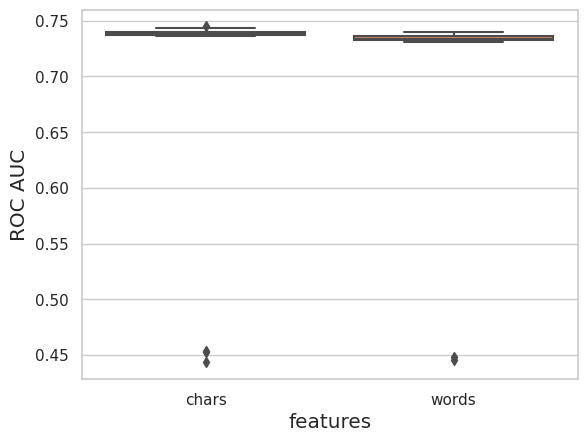

In [16]:
sns.boxplot(
    data = data.groupby("name")[["dev_roc_auc", "features"]].min(),
    x = "features", 
    y = "dev_roc_auc"
)
# plt.ylim(0)
plt.xlabel("features", fontsize = "large")
plt.ylabel("ROC AUC", fontsize = "large")
plt.show()

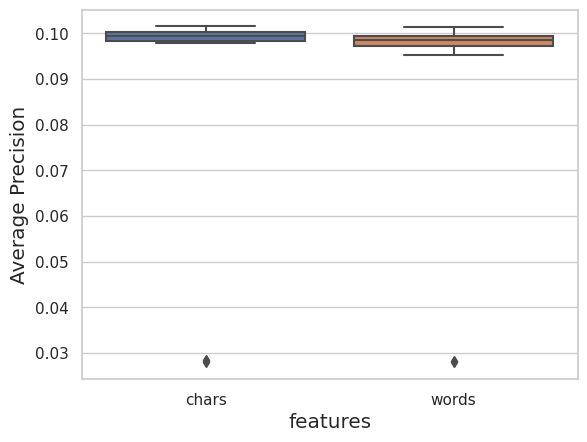

In [17]:
sns.boxplot(
    data = data.groupby("name")[["dev_average_precision", "features"]].min(),
    x = "features", 
    y = "dev_average_precision"
)
# plt.ylim(0)
plt.xlabel("features", fontsize = "large")
plt.ylabel("Average Precision", fontsize = "large")
plt.show()

In [18]:
data.groupby("name")[["features", "dev_average_precision"]].max()\
.groupby("features").dev_average_precision.describe().T

features,chars,words
count,15.000000,28.000000
mean,0.090281,0.090981
std,0.025154,0.022179
min,0.028352,0.028046
25%,0.098731,0.097105
50%,0.099593,0.098450
75%,0.100287,0.099361
max,0.101510,0.101370


# metrics

In [19]:
data.groupby(["hidden_size", "num_layers"])\
.train_loss\
.min().unstack()\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,0.141747,0.138514,0.136699,0.137452
200,0.139039,0.139725,0.138342,0.138733
300,0.137618,0.140061,0.140343,0.140710
400,0.141885,0.140446,nan,0.002087


In [20]:
data.groupby(["hidden_size", "num_layers"])\
.dev_roc_auc\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,0.733400,0.734700,0.741100,0.743500
200,0.738800,0.737700,0.744800,0.738800
300,0.737000,0.738900,0.733400,0.739400
400,0.736400,0.736300,nan,0.730900


In [21]:
data.groupby(["hidden_size", "num_layers"])\
.dev_average_precision\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,0.098700,0.098500,0.101500,0.100700
200,0.099300,0.098300,0.101500,0.099700
300,0.100100,0.100700,0.098400,0.099300
400,0.101400,0.096300,nan,0.097100


In [22]:
data.groupby(["hidden_size", "num_layers"])\
.training_minutes\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,340.413600,336.640500,586.325300,501.586700
200,939.629600,306.346300,954.219800,1043.285500
300,1320.513200,1053.726800,916.782600,1059.198600
400,1091.407400,1305.276700,nan,1376.258200


# queries

In [25]:
data.query("name == '14986643_2.pkl'")

,epoch,train_loss,features,hidden_size,num_layers,total_epochs,training_minutes,dev_average_precision,dev_roc_auc,name
0,1,0.144849,chars,100,3,8,243.061931,0.10151,0.741146,14986643_2.pkl
1,2,0.140785,chars,100,3,8,243.061931,0.10151,0.741146,14986643_2.pkl
2,3,0.139398,chars,100,3,8,243.061931,0.10151,0.741146,14986643_2.pkl
3,4,0.138432,chars,100,3,8,243.061931,0.10151,0.741146,14986643_2.pkl
4,5,0.137797,chars,100,3,8,243.061931,0.10151,0.741146,14986643_2.pkl
5,6,0.137513,chars,100,3,8,243.061931,0.10151,0.741146,14986643_2.pkl
6,7,0.137269,chars,100,3,8,243.061931,0.10151,0.741146,14986643_2.pkl
7,8,0.137217,chars,100,3,8,243.061931,0.10151,0.741146,14986643_2.pkl
